# **Importing Libraries**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

from keras.callbacks import ModelCheckpoint

**Data Preparation**

In [3]:
# Paths for data.
Ravdess = "/content/drive/MyDrive/Colab Notebooks/speech dataset/Ravdess/audio_speech_actors_01-24/"
Crema = "/content/drive/MyDrive/Colab Notebooks/speech dataset/Crema/"
Tess = "/content/drive/MyDrive/Colab Notebooks/speech dataset/Tess/"
Savee = "/content/drive/MyDrive/Colab Notebooks/speech dataset/Savee/"

1. Ravdess Dataframe

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/Colab Notebooks/speech ...
1,fear,/content/drive/MyDrive/Colab Notebooks/speech ...
2,happy,/content/drive/MyDrive/Colab Notebooks/speech ...
3,happy,/content/drive/MyDrive/Colab Notebooks/speech ...
4,fear,/content/drive/MyDrive/Colab Notebooks/speech ...


2. Crema DataFrame

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,fear,/content/drive/MyDrive/Colab Notebooks/speech ...
1,fear,/content/drive/MyDrive/Colab Notebooks/speech ...
2,happy,/content/drive/MyDrive/Colab Notebooks/speech ...
3,neutral,/content/drive/MyDrive/Colab Notebooks/speech ...
4,disgust,/content/drive/MyDrive/Colab Notebooks/speech ...


**3. TESS dataset**

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        # Remove any additional information like (1) from the emotion label
        part = part.split(' ')[0].lower()

        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)

        file_path.append(os.path.join(Tess, dir, file))

# DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# DataFrame for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.tail()

,Emotions,Path
2814,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
2815,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
2816,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
2817,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
2818,angry,/content/drive/MyDrive/Colab Notebooks/speech ...


In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
1,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
2,disgust,/content/drive/MyDrive/Colab Notebooks/speech ...
3,angry,/content/drive/MyDrive/Colab Notebooks/speech ...
4,angry,/content/drive/MyDrive/Colab Notebooks/speech ...


In [10]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

,Emotions,Path
0,calm,/content/drive/MyDrive/Colab Notebooks/speech ...
1,fear,/content/drive/MyDrive/Colab Notebooks/speech ...
2,happy,/content/drive/MyDrive/Colab Notebooks/speech ...
3,happy,/content/drive/MyDrive/Colab Notebooks/speech ...
4,fear,/content/drive/MyDrive/Colab Notebooks/speech ...
...,...,...
475,neutral,/content/drive/MyDrive/Colab Notebooks/speech ...
476,neutral,/content/drive/MyDrive/Colab Notebooks/speech ...
477,sad,/content/drive/MyDrive/Colab Notebooks/speech ...
478,sad,/content/drive/MyDrive/Colab Notebooks/speech ...


## Data Visualisation and Exploration

In [9]:
data_path.shape

(12207, 2)

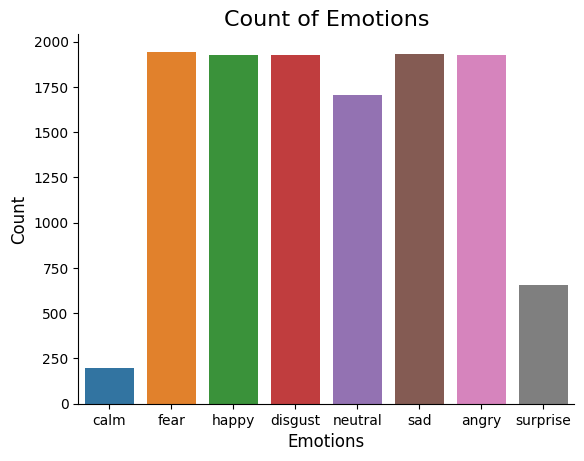

In [ ]:
#First plot the count of each emotions in our dataset.
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(ax, data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))

    ax.set_title(e)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.specgram(data, Fs=sr, cmap='plasma')


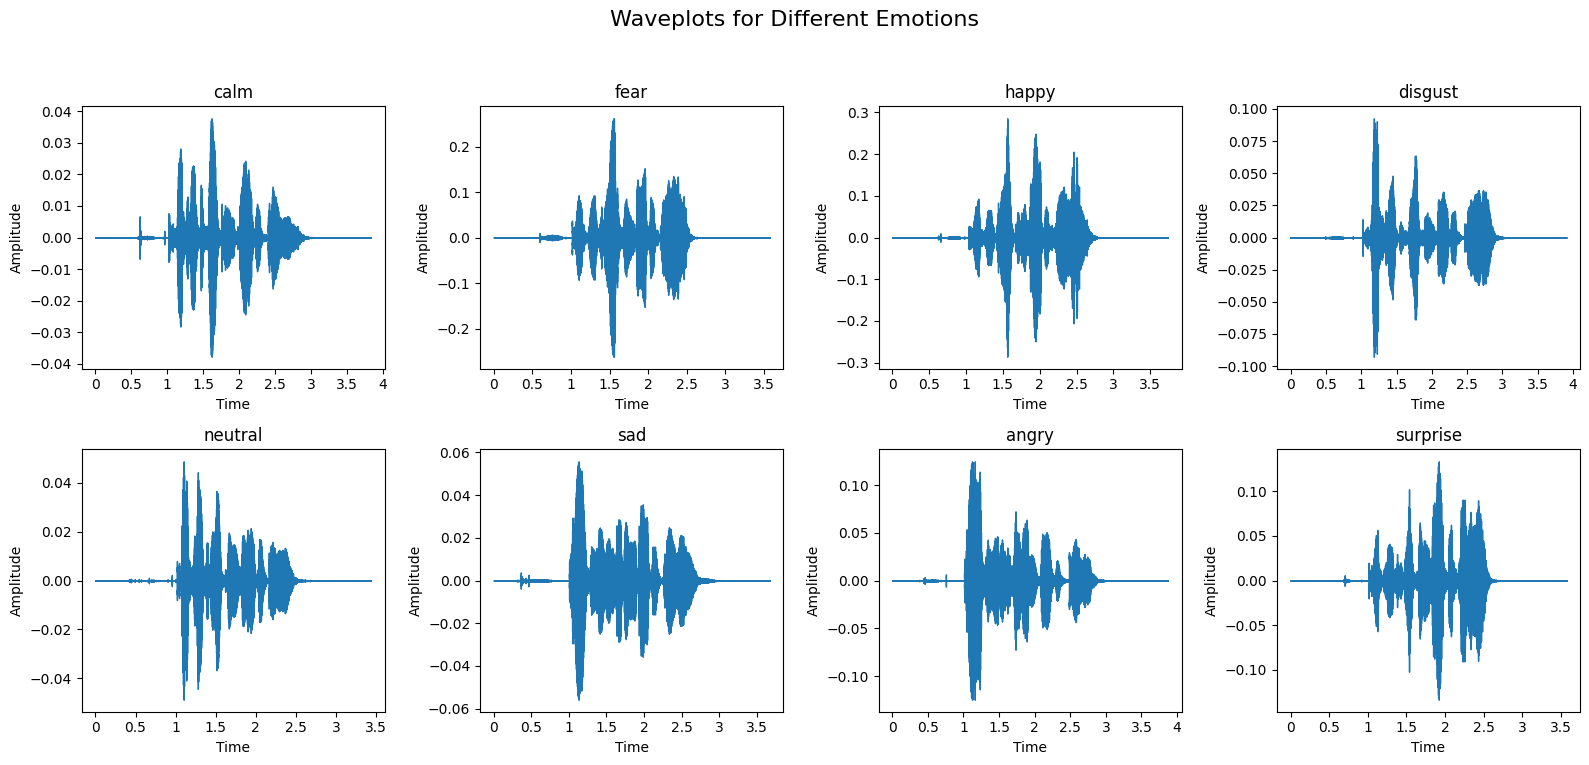

In [ ]:
# Get a list of unique emotions
unique_emotions = data_path.Emotions.unique()

# Determine the number of rows and columns for the grid
num_rows = len(unique_emotions) // 4 + (len(unique_emotions) % 4 > 0)
num_cols = min(len(unique_emotions), 4)

# Create a grid for waveplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))
fig.suptitle('Waveplots for Different Emotions', size=16)

# Loop through each emotion and create a waveplot
for i, emotion in enumerate(unique_emotions):
    # Get paths for all audio files with the specified emotion
    paths = np.array(data_path.Path[data_path.Emotions == emotion])

    # Load the first audio file for this emotion
    path = paths[0]
    data, sampling_rate = librosa.load(path)

    # Create a waveform plot using matplotlib
    axes[i // num_cols, i % num_cols].set_title(emotion)
    axes[i // num_cols, i % num_cols].set_xlabel('Time (s)')
    axes[i // num_cols, i % num_cols].set_ylabel('Amplitude')
    librosa.display.waveshow(data, sr=sampling_rate, ax=axes[i // num_cols, i % num_cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


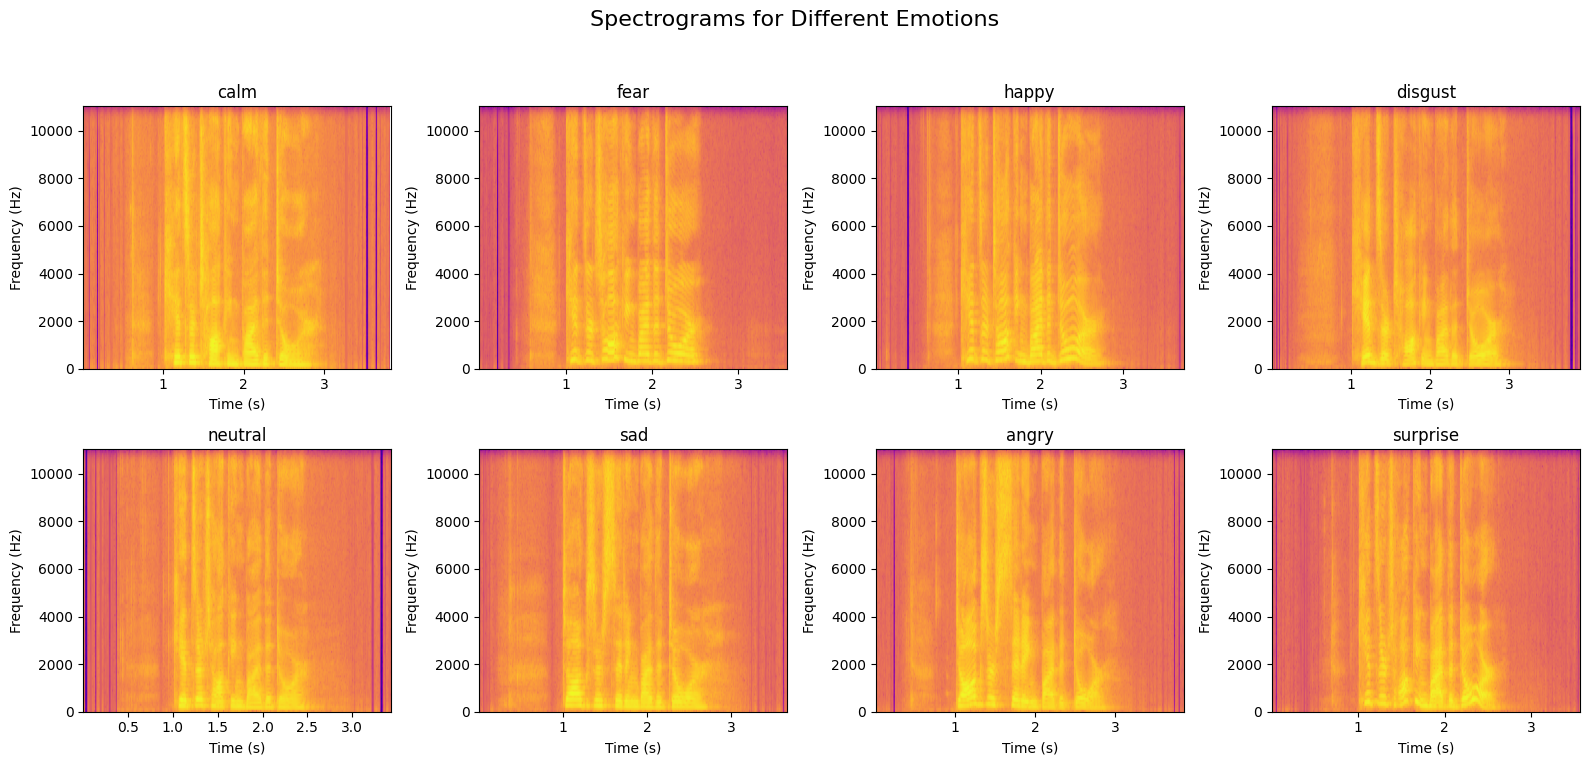

In [ ]:


# Get a list of unique emotions
unique_emotions = data_path.Emotions.unique()

# Determine the number of rows and columns for the grid
num_rows = len(unique_emotions) // 4 + (len(unique_emotions) % 4 > 0)
num_cols = min(len(unique_emotions), 4)

# Create a grid for spectrograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4 * num_rows))
fig.suptitle('Spectrograms for Different Emotions', size=16)

# Loop through each emotion and create a spectrogram
for i, emotion in enumerate(unique_emotions):
    # Get paths for all audio files with the specified emotion
    paths = np.array(data_path.Path[data_path.Emotions == emotion])

    # Load the first audio file for this emotion
    path = paths[0]
    data, sampling_rate = librosa.load(path)

    # Create a spectrogram plot using matplotlib
    create_spectrogram(axes[i // num_cols, i % num_cols], data, sr=sampling_rate, e=emotion)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sample_rate):
    return librosa.effects.pitch_shift(data, sr = sample_rate,n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

1. Simple Audio

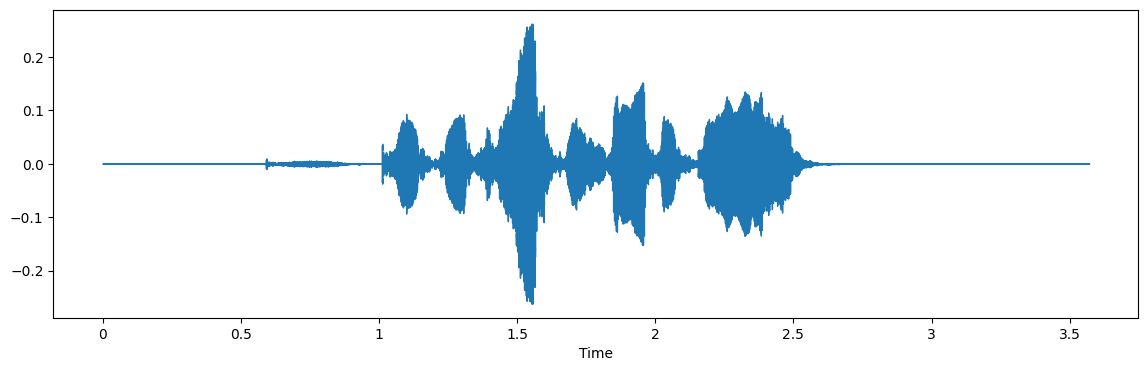

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise Injection

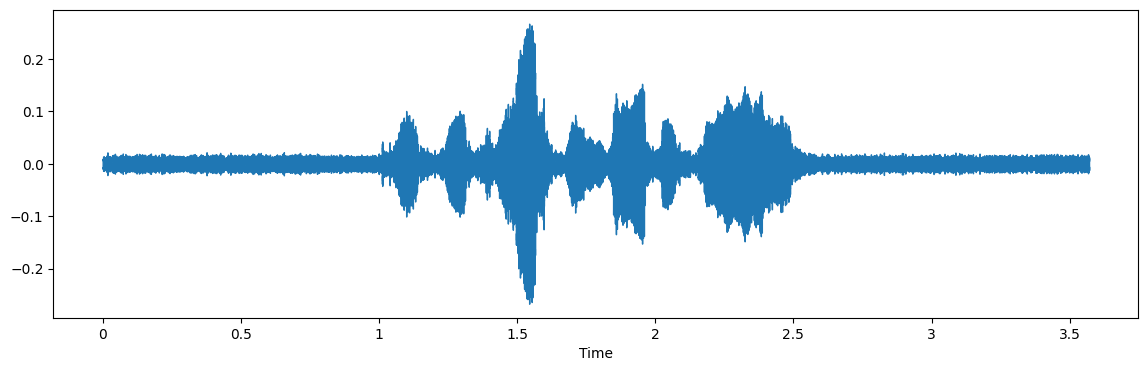

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

3. Stretching

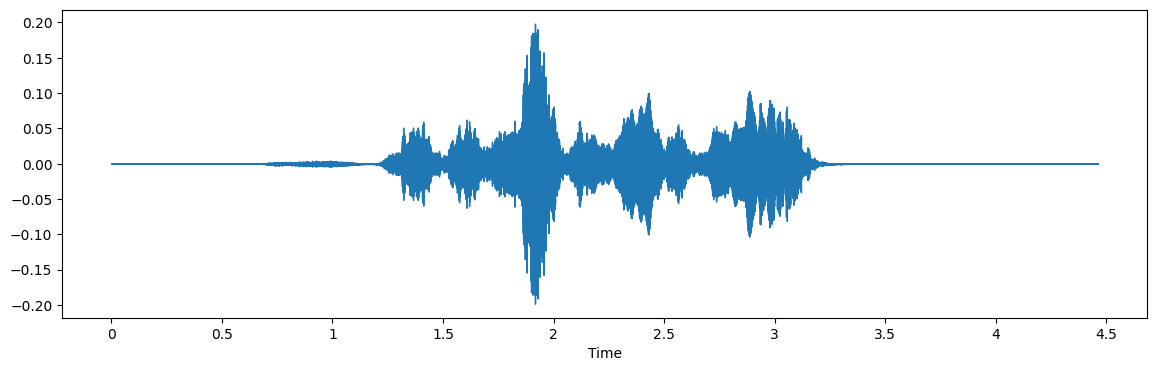

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

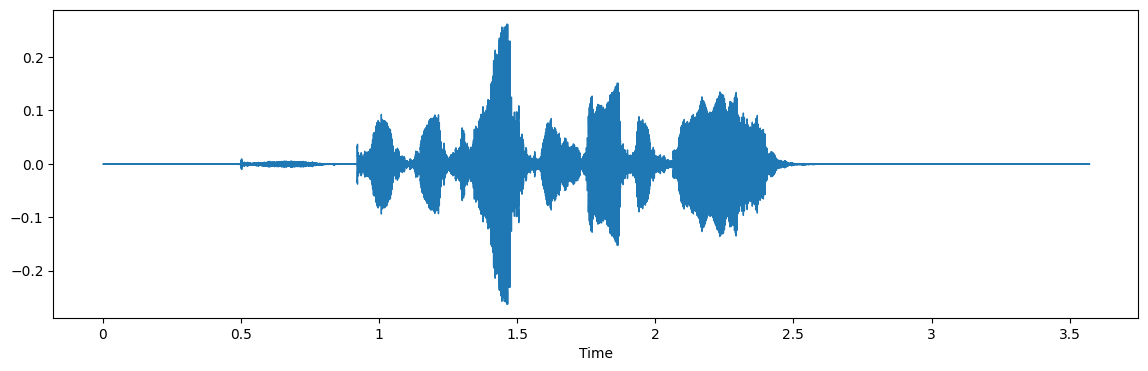

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

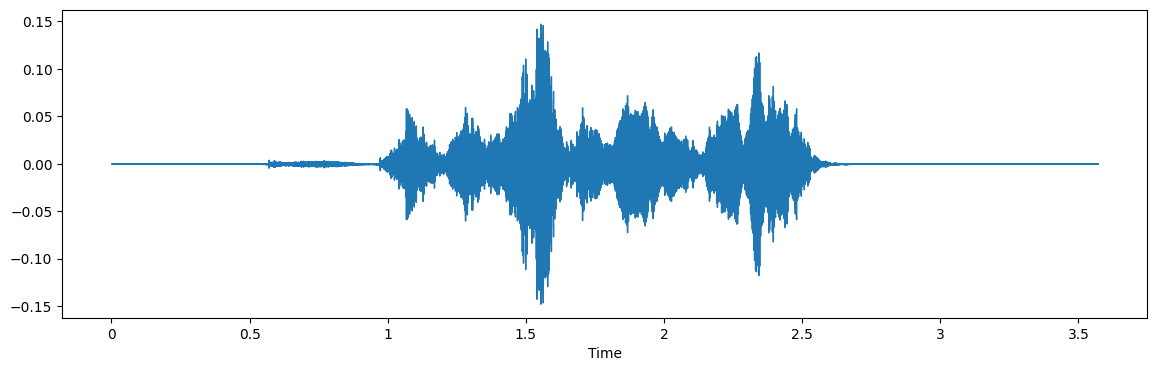

In [ ]:
x = pitch(data,sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
Y = []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        # X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
speech = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/speech_files/features.csv')
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.181292,0.519621,0.529958,0.561053,0.568794,0.592090,0.562296,0.578157,0.528702,0.547879,...,0.000036,0.000041,0.000030,0.000031,0.000031,0.000049,0.000059,0.000025,2.302930e-06,calm
1,0.228796,0.638067,0.593239,0.622833,0.633512,0.668962,0.683140,0.620619,0.615722,0.568773,...,0.000041,0.000047,0.000035,0.000036,0.000037,0.000054,0.000064,0.000031,7.552248e-06,calm
2,0.152438,0.611895,0.499157,0.520693,0.523684,0.523956,0.550944,0.533969,0.563959,0.499444,...,0.000009,0.000006,0.000007,0.000008,0.000004,0.000007,0.000006,0.000006,6.561182e-07,calm
3,0.224781,0.610454,0.599744,0.685319,0.657021,0.608440,0.498562,0.507481,0.560148,0.553468,...,0.000700,0.000870,0.000733,0.000642,0.000802,0.000763,0.000936,0.000674,6.620726e-05,fear
4,0.319521,0.697630,0.693472,0.775637,0.788326,0.771114,0.667998,0.597759,0.618466,0.605755,...,0.003874,0.004050,0.003805,0.003806,0.003869,0.003834,0.003966,0.003717,3.324965e-03,fear


In [ ]:
Features['labels'] = Features['labels'].replace('fear (1)', 'fear')

In [ ]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.181292,0.519621,0.529958,0.561053,0.568794,0.592090,0.562296,0.578157,0.528702,0.547879,...,0.000036,0.000041,0.000030,0.000031,0.000031,0.000049,0.000059,0.000025,2.302930e-06,calm
1,0.228796,0.638067,0.593239,0.622833,0.633512,0.668962,0.683140,0.620619,0.615722,0.568773,...,0.000041,0.000047,0.000035,0.000036,0.000037,0.000054,0.000064,0.000031,7.552248e-06,calm
2,0.152438,0.611895,0.499157,0.520693,0.523684,0.523956,0.550944,0.533969,0.563959,0.499444,...,0.000009,0.000006,0.000007,0.000008,0.000004,0.000007,0.000006,0.000006,6.561182e-07,calm
3,0.224781,0.610454,0.599744,0.685319,0.657021,0.608440,0.498562,0.507481,0.560148,0.553468,...,0.000700,0.000870,0.000733,0.000642,0.000802,0.000763,0.000936,0.000674,6.620726e-05,fear
4,0.319521,0.697630,0.693472,0.775637,0.788326,0.771114,0.667998,0.597759,0.618466,0.605755,...,0.003874,0.004050,0.003805,0.003806,0.003869,0.003834,0.003966,0.003717,3.324965e-03,fear


## Data Preparation

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27465, 162), (27465, 8), (9156, 162), (9156, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27465, 162), (27465, 8), (9156, 162), (9156, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27465, 162, 1), (27465, 8), (9156, 162, 1), (9156, 8))

## Modelling

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 81, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 21, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
430/430 [==============================] - 189s 435ms/step - loss: 1.6920 - accuracy: 0.3209 - val_loss: 1.4235 - val_accuracy: 0.4332 - lr: 0.0010
Epoch 2/50
430/430 [==============================] - 187s 436ms/step - loss: 1.4473 - accuracy: 0.4175 - val_loss: 1.3050 - val_accuracy: 0.4765 - lr: 0.0010
Epoch 3/50
430/430 [==============================] - 183s 426ms/step - loss: 1.3632 - accuracy: 0.4536 - val_loss: 1.2276 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 4/50
430/430 [==============================] - 181s 422ms/step - loss: 1.3188 - accuracy: 0.4719 - val_loss: 1.1959 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 5/50
430/430 [==============================] - 182s 422ms/step - loss: 1.2742 - accuracy: 0.4897 - val_loss: 1.1825 - val_accuracy: 0.5322 - lr: 0.0010
Epoch 6/50
430/430 [==============================] - 180s 419ms/step - loss: 1.2467 - accuracy: 0.5011 - val_loss: 1.1711 - val_accuracy: 0.5349 - lr: 0.0010
Epoch 7/50
430/430 [==========================

287/287 [==============================] - 24s 85ms/step - loss: 1.0886 - accuracy: 0.6079
Accuracy of our model on test data :  60.790735483169556 %


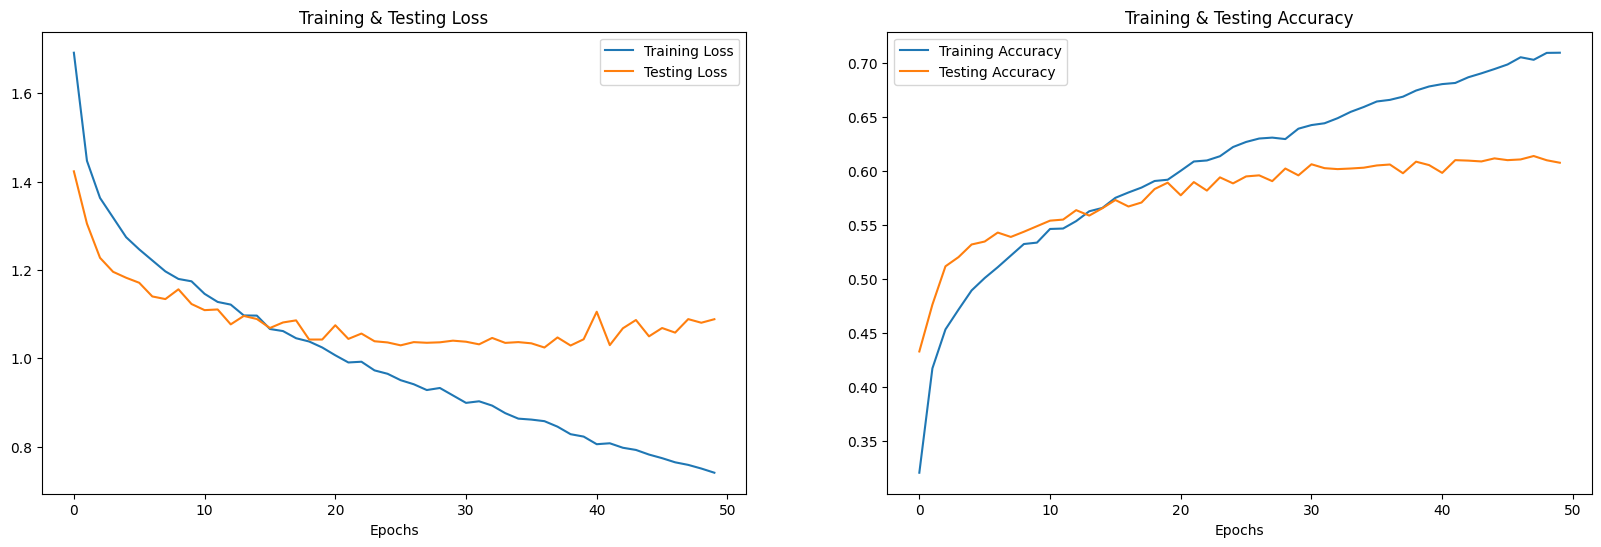

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

287/287 [==============================] - 22s 74ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)


,Predicted Labels,Actual Labels
0,calm,calm
1,sad,sad
2,angry,angry
3,calm,calm
4,happy,happy
5,sad,disgust
6,fear,fear
7,sad,sad
8,neutral,neutral
9,angry,angry


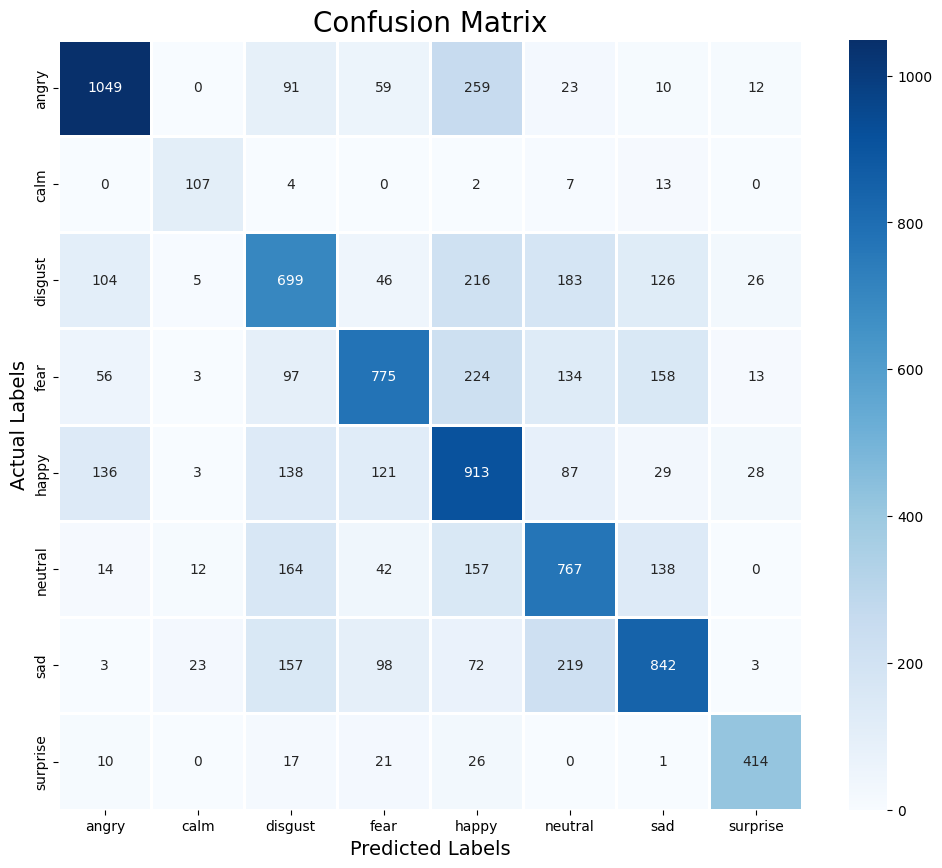

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.70      0.73      1503
        calm       0.70      0.80      0.75       133
     disgust       0.51      0.50      0.50      1405
        fear       0.67      0.53      0.59      1460
       happy       0.49      0.63      0.55      1455
     neutral       0.54      0.59      0.57      1294
         sad       0.64      0.59      0.62      1417
    surprise       0.83      0.85      0.84       489

    accuracy                           0.61      9156
   macro avg       0.64      0.65      0.64      9156
weighted avg       0.62      0.61      0.61      9156

